In [1]:
import os
print(os.getcwd())

C:\Users\lenovo


In [2]:
import os
os.chdir(r'C:\Users\soloman\clm')
print(os.getcwd())

C:\Users\soloman\clm


In [3]:
import pandas as pd
df_women=pd.read_csv('women.csv',index_col=0)
print(df_women.head())

   height  weight
1      58     115
2      59     117
3      60     120
4      61     123
5      62     126


In [4]:
df_women.shape

(15, 2)

In [5]:
df_women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   height  15 non-null     int64
 1   weight  15 non-null     int64
dtypes: int64(2)
memory usage: 360.0 bytes


In [6]:
print(df_women.columns)

Index(['height', 'weight'], dtype='object')


In [7]:
df_women.describe()

,height,weight
count,15.000000,15.000000
mean,65.000000,136.733333
std,4.472136,15.498694
min,58.000000,115.000000
25%,61.500000,124.500000
50%,65.000000,135.000000
75%,68.500000,148.000000
max,72.000000,164.000000


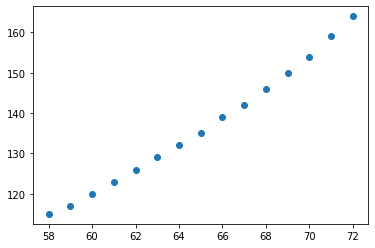

In [8]:
#数据可视化
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_women["height"],df_women["weight"])
plt.show()#因%matplotlib inline存在，plt.show()可以省略不写

In [9]:
X=df_women["height"]
X

1     58
2     59
3     60
4     61
5     62
6     63
7     64
8     65
9     66
10    67
11    68
12    69
13    70
14    71
15    72
Name: height, dtype: int64

In [10]:
y=df_women["weight"]
y

1     115
2     117
3     120
4     123
5     126
6     129
7     132
8     135
9     139
10    142
11    146
12    150
13    154
14    159
15    164
Name: weight, dtype: int64

In [11]:
#模型训练
import statsmodels.api as sm
X=sm.add_constant(X)
X

,const,height
1,1.0,58
2,1.0,59
3,1.0,60
4,1.0,61
5,1.0,62
6,1.0,63
7,1.0,64
8,1.0,65
9,1.0,66
10,1.0,67


In [12]:
myModel=sm.OLS(y,X)

In [13]:
results=myModel.fit()

In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           1.09e-14
Time:                        13:20:58   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.5167      5.937    -14.741      0.0

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
results.params

const    -87.516667
height     3.450000
dtype: float64

In [16]:
results.resid

1     2.416667
2     0.966667
3     0.516667
4     0.066667
5    -0.383333
6    -0.833333
7    -1.283333
8    -1.733333
9    -1.183333
10   -1.633333
11   -1.083333
12   -0.533333
13    0.016667
14    1.566667
15    3.116667
dtype: float64

In [17]:
results.resid.std()

1.469531833450304

In [18]:
results.conf_int(alpha=0.025)

,0,1
const,-102.552796,-72.480538
height,3.219184,3.680816


In [19]:
print("rsquared=",results.rsquared)

rsquared= 0.9910098326857505


In [20]:
results.tvalues

const    -14.741029
height    37.855307
dtype: float64

In [21]:
results.f_pvalue

1.0909729585997682e-14

In [22]:
sm.stats.stattools.durbin_watson(results.resid)

0.3153803748621851

In [23]:
sm.stats.stattools.jarque_bera(results.resid)

(1.6595730644309743,
 0.4361423787323869,
 0.7893583826332262,
 2.5963042257390008)

In [24]:
y_predict=results.predict()
y_predict

array([112.58333333, 116.03333333, 119.48333333, 122.93333333,
       126.38333333, 129.83333333, 133.28333333, 136.73333333,
       140.18333333, 143.63333333, 147.08333333, 150.53333333,
       153.98333333, 157.43333333, 160.88333333])

Text(0, 0.5, '体重')

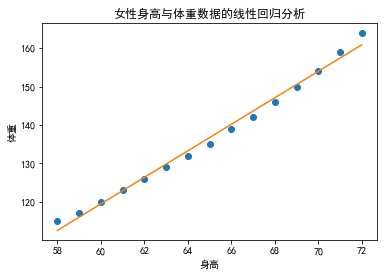

In [25]:
plt.rcParams['font.family']="simHei"
plt.plot(df_women["height"],df_women["weight"],"o")
plt.plot(df_women["height"],y_predict)
plt.title('女性身高与体重数据的线性回归分析')
plt.xlabel('身高')
plt.ylabel('体重')


In [26]:
import numpy as np
myModel_updated=sm.OLS(y,X+np.power(X,2)+np.power(X,3))
results_updated=myModel_updated.fit()
print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     8021.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           1.57e-19
Time:                        13:20:58   Log-Likelihood:                -13.680
No. Observations:                  15   AIC:                             31.36
Df Residuals:                      13   BIC:                             32.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.2178      0.289     70.056      0.0

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [27]:
print('查看系数及截距项：',results.params)

查看系数及截距项： const    -87.516667
height     3.450000
dtype: float64


In [28]:
y_predict_updated=results_updated.predict()
y_predict_updated

array([114.10651527, 116.90256998, 119.79447404, 122.78384288,
       125.87229194, 129.06143667, 132.3528925 , 135.74827487,
       139.24919922, 142.85728098, 146.5741356 , 150.40137852,
       154.34062516, 158.39349098, 162.5615914 ])

Text(0, 0.5, '体重')

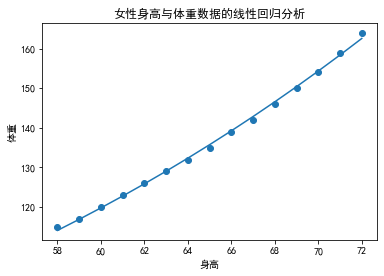

In [29]:
plt.rcParams['font.family']="simHei"
plt.scatter(df_women["height"],df_women["weight"])
plt.plot(df_women["height"],y_predict_updated)
plt.title('女性身高与体重数据的线性回归分析')
plt.xlabel('身高')
plt.ylabel('体重')

C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


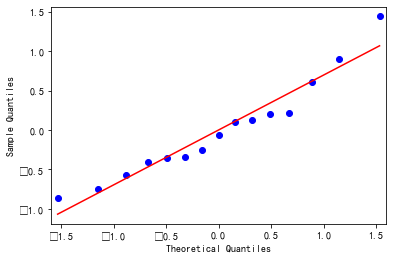

In [30]:
myQqplot=sm.qqplot(results_updated.resid,line='r')

In [31]:
sm.stats.stattools.durbin_watson(results_updated.resid)

0.5975852265966888

In [32]:
results_updated.outlier_test()

,student_resid,unadj_p,bonf(p)
1,1.666109,0.121560,1.000000
2,0.160314,0.875301,1.000000
3,0.332974,0.744899,1.000000
4,0.344766,0.736237,1.000000
5,0.200433,0.844498,1.000000
6,-0.095368,0.925596,1.000000
7,-0.550927,0.591793,1.000000
8,-1.219534,0.246070,1.000000
9,-0.385795,0.706401,1.000000
10,-1.434884,0.176866,1.000000


C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


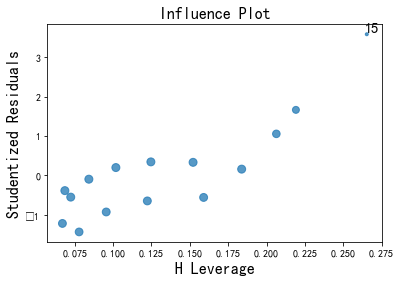

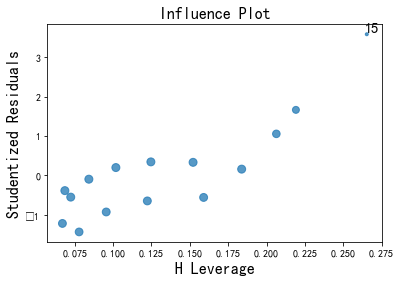

In [33]:
sm.graphics.influence_plot(results_updated,size=3)

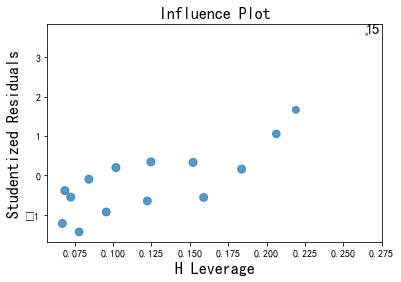

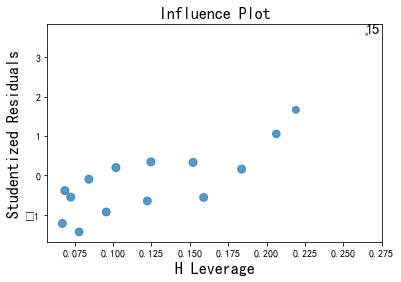

In [34]:
sm.graphics.influence_plot(results_updated,critiren="Cooks",size=2)